In [1]:
import os
import csv
import ast
import pickle
from pathlib import Path
import numpy as np
import pandas as pd
from scipy import stats
import colorcet as cc
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

plt.rcParams['font.size'] = 14



['#ff6700', '#f9cb24', '#63ae0e', '#0068b0']


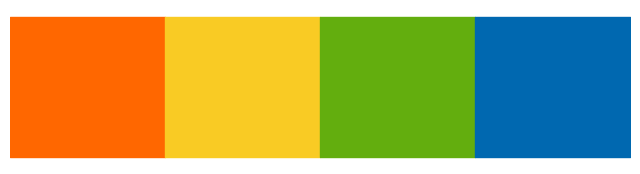

In [3]:
# Get colorcet colors
colors = np.array([cc.cm.rainbow.reversed()(i) for i in np.linspace(0.1, 0.9, 4)])

# Convert to hex format
hex_colors = [mcolors.to_hex(color) for color in colors]
print(hex_colors)


# Plot the colors
plt.figure(figsize=(8, 2))
for i, color in enumerate(hex_colors):
    plt.fill_between([i, i+1], 0, 1, color=color)
plt.xlim(0, len(hex_colors))
plt.xticks([])
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show()

'#ebcd24', '#a1bc18', '#4da910', '#35876f'
'#147a8e', '#0068b0', '#0051d6', '#0035f9'

In [ ]:
plt.figure(figsize=(4.5, 3.8), dpi=180)

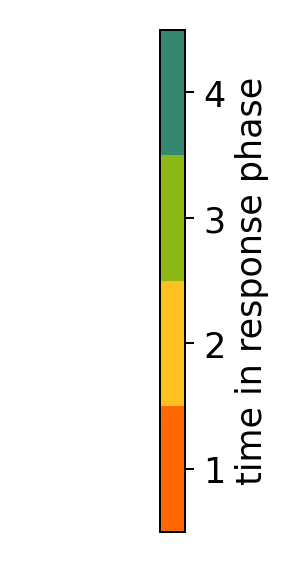

In [9]:
colors = np.array([cc.cm.rainbow.reversed()(i) for i in np.linspace(0.1, 0.8, 4)])
colormap_label = "time in response phase"

plt.figure(figsize=(1.2, 3.8), dpi=180)
ax = plt.gca()

cmap = ListedColormap(colors)
norm = plt.Normalize(vmin=0.5, vmax=0.5+4)
plt.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ticks=np.arange(1, 5), label=colormap_label, ax=ax)
plt.xticks([])
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.show()

0.03140159231631414 0.028363665136931778


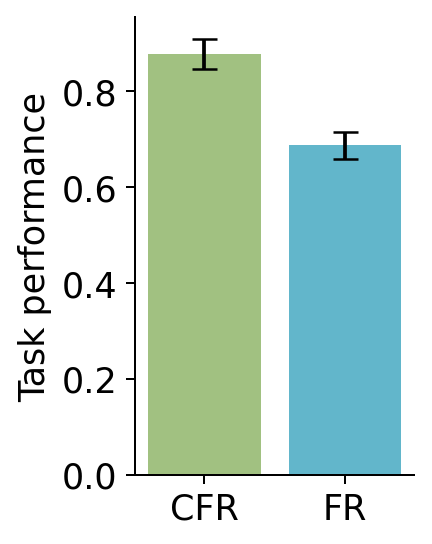

In [11]:
condfr_perf = np.array([0.448, 0.45175, 0.44975, 0.432, 0.41025]) * 2
fr_perf = np.array([0.7165, 0.713, 0.68475, 0.680125, 0.63775])
condfr_perf_std = np.std(condfr_perf)
fr_perf_std = np.std(fr_perf)
print(condfr_perf_std, fr_perf_std)

plt.figure(figsize=(2, 3.3), dpi=180)
plt.bar(0, np.mean(condfr_perf), color="#A1C181", yerr=[condfr_perf_std], capsize=5)
plt.bar(1, np.mean(fr_perf), color="#62B6CB", yerr=[fr_perf_std], capsize=5)
plt.xticks([0, 1], ["CFR", "FR"])
# plt.ylabel("Proportion of explained\nvariance of index > 0.4")
plt.ylabel("Task performance")
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()


In [2]:
def load_data(path, model_num):
    data_single_model = {}
    data_single_model["model_num"] = model_num
    # data_single_model["exp"] = exp

    # for key, value in paramters.items():
    #     data_single_model[key] = value

    # data_single_model["accuracy"] = float(row[0])
    # data_single_model["forward_asymmetry"] = float(row[1])
    # data_single_model["temporal_factor"] = float(row[2])

    classifier_data = pickle.load(open(path/"ridge_classifier_stat.pkl", "rb"))
    data_single_model["index_decoding_accuracy_encoding_phase"] = classifier_data["index_enc_acc"]
    data_single_model["item_decoding_accuracy_encoding_phase"] = classifier_data["item_enc_acc"]
    data_single_model["last_item_decoding_accuracy_encoding_phase"] = classifier_data["item_enc_acc_last"]
    data_single_model["index_decoding_accuracy_recall_phase"] = classifier_data["index_rec_acc"]
    data_single_model["item_decoding_accuracy_recall_phase"] = classifier_data["item_rec_acc"]
    data_single_model["last_item_decoding_accuracy_recall_phase"] = classifier_data["item_rec_acc_last"]
    data_single_model["index_decoding_accuracy"] = (data_single_model["index_decoding_accuracy_encoding_phase"] + data_single_model["index_decoding_accuracy_recall_phase"]) / 2
    data_single_model["item_decoding_accuracy"] = (data_single_model["item_decoding_accuracy_encoding_phase"] + data_single_model["item_decoding_accuracy_recall_phase"]) / 2
    data_single_model["last_item_decoding_accuracy"] = (data_single_model["last_item_decoding_accuracy_encoding_phase"] + data_single_model["last_item_decoding_accuracy_recall_phase"]) / 2

    explained_variance_data = np.load(path/"explained_variance.npy")
    data_single_model["explained_variance_encoding_index"] = explained_variance_data[0]
    data_single_model["explained_variance_recall_index"] = explained_variance_data[1]
    data_single_model["explained_variance_index"] = (data_single_model["explained_variance_encoding_index"] + data_single_model["explained_variance_recall_index"]) / 2
    data_single_model["explained_variance_encoding_identity"] = explained_variance_data[2]
    data_single_model["explained_variance_recall_identity"] = explained_variance_data[3]
    data_single_model["explained_variance_identity"] = (data_single_model["explained_variance_encoding_identity"] + data_single_model["explained_variance_recall_identity"]) / 2

    cross_decoding_data = np.load(path/"cross_acc.npy")
    data_single_model["cross_decoding_accuracy_index_rec_enc"] = cross_decoding_data[0]
    data_single_model["cross_decoding_accuracy_identity_rec_enc"] = cross_decoding_data[1]
    data_single_model["cross_decoding_accuracy_index_enc_rec"] = cross_decoding_data[2]
    data_single_model["cross_decoding_accuracy_identity_enc_rec"] = cross_decoding_data[3]
    data_single_model["cross_decoding_accuracy_index"] = (data_single_model["cross_decoding_accuracy_index_rec_enc"] + data_single_model["cross_decoding_accuracy_index_enc_rec"]) / 2
    data_single_model["cross_decoding_accuracy_identity"] = (data_single_model["cross_decoding_accuracy_identity_rec_enc"] + data_single_model["cross_decoding_accuracy_identity_enc_rec"]) / 2

            # try:
            #     training_data = np.load(training_data_path/"accuracy_2.npy")
            # except:
            #     training_data = np.load(training_data_path/"accuracy_1.npy")
            # # find the final consecutive zeros in the training data and set it to the last non-zero value
            # zero_indices = np.where(training_data == 0)[0]
            # if len(zero_indices) > 0:
            #     last_zero_index = zero_indices[0]
            #     training_data[last_zero_index:] = training_data[last_zero_index-1]
            # if training_data.shape[0] < training_data_length and training_data.shape[0] > 0:
            #     training_data = np.pad(training_data, (0, training_data_length - training_data.shape[0]), mode='constant', constant_values=training_data[-1])
            # data_single_model["training_accuracy"] = training_data
    return data_single_model


In [3]:
data_condfr = []

data_folder = Path("./experiments/CondFR/figures/free_recall/ValueMemoryGRU")
# training_curve_folder = Path("./experiments/CondFR/saved_models/free_recall/ValueMemoryGRU")
# perturbation_folder = Path("./experiments/CondFR/figures/perturbation/free_recall/ValueMemoryGRU")
# item_invariance_folder = Path("./experiments/CondFR/figures/item_invariant/free_recall/ValueMemoryGRU")
seq_len = 8

setups = ["setup_condfr_fixone_noise", "setup_condfr_fixone_noise2", "setup_condfr_fixone_noise3"]

for setup in setups:
    for i in range(5):
        data_path = data_folder / setup / str(i)
        # training_data_path = training_curve_folder / (setup + "-" + str(i))
        if os.path.exists(data_path/"cross_acc.npy"):
            data_single_model = load_data(data_path, i)
            if data_single_model:
                data_single_model["pretrained"] = False
                # perturbation_data = np.load(perturbation_folder / setup_name / str(i) / "perturbation_accuracies.npy")
                # data_single_model["perturbation_accuracy"] = perturbation_data
                # if os.path.exists(item_invariance_folder / setup / str(i) / "decoding_accuracy.npy"):
                #     item_invariance_data = np.load(item_invariance_folder / setup / str(i) / "decoding_accuracy.npy")
                #     data_single_model["item_invariance_accuracy"] = item_invariance_data
                # else:
                #     data_single_model["item_invariance_accuracy"] = None
                # data_reservoir.append(data_single_model)
                data_condfr.append(data_single_model)

df_condfr = pd.DataFrame(data_condfr)
print(len(df_condfr))

10


0.021871206782432307 0.0065862491446453935
0.1955545268469318 0.020826760548037778


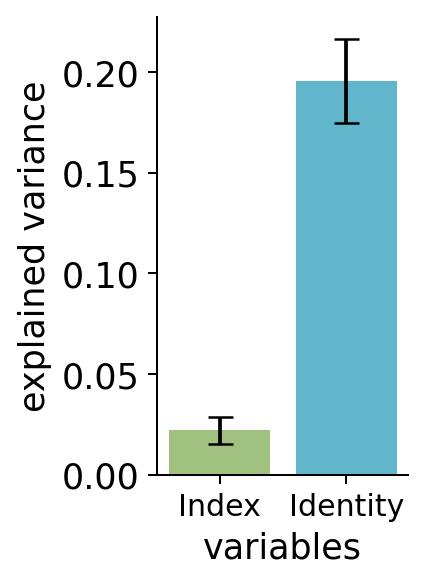

In [9]:
explained_variance_index_mean = df_condfr["explained_variance_index"].mean()
explained_variance_index_std = df_condfr["explained_variance_index"].std()
print(explained_variance_index_mean, explained_variance_index_std)

explained_variance_identity_mean = df_condfr["explained_variance_identity"].mean()
explained_variance_identity_std = df_condfr["explained_variance_identity"].std()
print(explained_variance_identity_mean, explained_variance_identity_std)


# Create a bar plot for the explained variance data
labels = ['Index', 'Identity']
means = [explained_variance_index_mean, explained_variance_identity_mean]
stds = [explained_variance_index_std, explained_variance_identity_std]

x = range(len(labels))

fig = plt.figure(figsize=(1.8, 3.3), dpi=180)
ax = plt.gca()
plt.bar(x, means, 0.8, yerr=stds, align='center', color=["#A1C181", "#62B6CB"], capsize=5)
# for i in range(len(df_condfr)):
#     plt.plot([0, 1], [df_condfr["explained_variance_index"].iloc[i], df_condfr["explained_variance_identity"].iloc[i]], color='grey', linestyle='-', linewidth=0.3, alpha=0.7)
plt.ylabel('explained variance')
plt.xlabel('variables')
ax.set_xticks([0,1])
ax.set_xticklabels(labels, fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()



0.13083925221464757 0.01663018332212946
0.394936487906159 0.05990558829522765


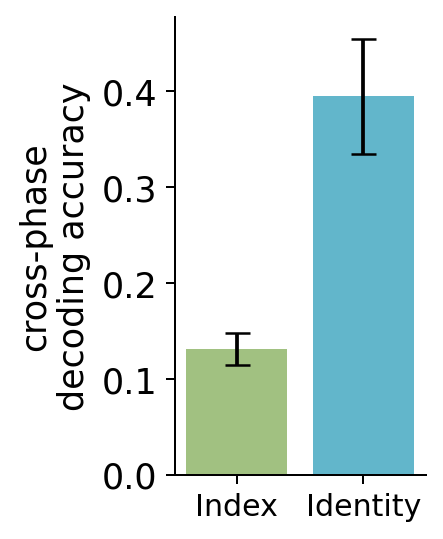

In [14]:
cross_decoding_accuracy_index_mean = df_condfr["cross_decoding_accuracy_index"].mean()
cross_decoding_accuracy_index_std = df_condfr["cross_decoding_accuracy_index"].std()
print(cross_decoding_accuracy_index_mean, cross_decoding_accuracy_index_std)

cross_decoding_accuracy_identity_mean = df_condfr["cross_decoding_accuracy_identity"].mean()
cross_decoding_accuracy_identity_std = df_condfr["cross_decoding_accuracy_identity"].std()
print(cross_decoding_accuracy_identity_mean, cross_decoding_accuracy_identity_std)


# Create a bar plot for the explained variance data
labels = ['Index', 'Identity']
means = [cross_decoding_accuracy_index_mean, cross_decoding_accuracy_identity_mean]
stds = [cross_decoding_accuracy_index_std, cross_decoding_accuracy_identity_std]

x = range(len(labels))

fig = plt.figure(figsize=(1.8, 3.3), dpi=180)
ax = plt.gca()
plt.bar(x, means, 0.8, yerr=stds, align='center', color=["#A1C181", "#62B6CB"], capsize=5)
plt.ylabel('cross-phase\ndecoding accuracy')
ax.set_xticks([0,1])
ax.set_xticklabels(labels, fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.show()

